In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import statsmodels.api as sm


df = pd.read_csv("C:\\Users\\yeduk\\OneDrive\\Desktop\\Data\\Data 605\\Project\\history-of-rock-spotify.csv")
df

,index,name,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,Smells Like Teen Spirit,Nirvana,1991,5.032000,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1,Stairway to Heaven - Remaster,Led Zeppelin,1971,8.047167,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,2,Bohemian Rhapsody - Remastered 2011,Queen,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,3,Imagine - Remastered 2010,John Lennon,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,4,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.713550,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,5479,I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.559833,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406
5480,5480,Cellophane,King Gizzard & The Lizard Wizard,2014,3.179750,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357
5481,5481,Hot Water,King Gizzard & The Lizard Wizard,2014,3.396450,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734
5482,5482,Vitamin C - 2004 Remastered Version,CAN,1972,3.567767,52,0.643,0.006690,0.644,0.673000,4,0.1620,-12.615,0.0462,117.225,4,0.853


In [52]:
col = ['index','name','artist','key']
df_new = df.drop(columns=col)

In [53]:
data = df_new.rename(columns={"release_date": "Release Date", 
                        "length": "Length of Song", 
                        "popularity" :"Popularity", 
                        "danceability" :"Danceability", 
                        "acousticness":"Acousticness", 
                        "energy":"Energy",
                        "instrumentalness": "Instrumentalness",
                        "liveness": "Liveness",
                        "loudness": "Loudness",
                        "speechiness": "Speechiness",
                        "tempo": "Tempo",
                        "time_signature": "Time Signature",
                        "valence":"Positiveness"
                        })
                        
data

,Release Date,Length of Song,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature,Positiveness
0,1991,5.032000,74,0.502,0.000025,0.912,0.000173,0.1060,-4.556,0.0564,116.761,4,0.720
1,1971,8.047167,78,0.338,0.580000,0.340,0.003200,0.1160,-12.049,0.0339,82.433,4,0.197
2,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0.2430,-9.961,0.0536,143.883,4,0.228
3,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0.0935,-12.358,0.0252,75.752,4,0.169
4,1965,3.713550,77,0.723,0.038300,0.863,0.031700,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,2014,3.559833,47,0.296,0.005910,0.776,0.801000,0.5970,-5.630,0.0597,93.481,4,0.406
5480,2014,3.179750,44,0.432,0.002130,0.887,0.916000,0.1200,-6.175,0.1230,92.965,4,0.357
5481,2014,3.396450,40,0.627,0.860000,0.609,0.890000,0.1160,-9.387,0.0332,86.861,4,0.734
5482,1972,3.567767,52,0.643,0.006690,0.644,0.673000,0.1620,-12.615,0.0462,117.225,4,0.853


In [54]:
correlation_matrix = data.corr()
correlation_matrix

,Release Date,Length of Song,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature,Positiveness
Release Date,1.000000,0.003281,-0.282614,-0.082780,-0.277685,0.285391,0.077449,0.091113,0.382334,0.064358,0.027662,0.026903,-0.215245
Length of Song,0.003281,1.000000,0.000198,-0.134880,-0.081761,-0.063400,0.125650,0.048147,-0.101349,-0.050859,-0.047545,0.010123,-0.246810
Popularity,-0.282614,0.000198,1.000000,0.115690,0.047653,-0.079499,-0.115815,-0.135936,-0.008251,-0.055595,-0.030013,0.015511,0.030984
Danceability,-0.082780,-0.134880,0.115690,1.000000,0.099566,-0.134408,-0.098507,-0.165255,-0.124727,-0.091101,-0.261845,0.110368,0.501211
Acousticness,-0.277685,-0.081761,0.047653,0.099566,1.000000,-0.594156,-0.016283,-0.032307,-0.452776,-0.072896,-0.138034,-0.107268,-0.009444
Energy,0.285391,-0.063400,-0.079499,-0.134408,-0.594156,1.000000,0.003642,0.162984,0.755346,0.256348,0.212975,0.130646,0.147017
Instrumentalness,0.077449,0.125650,-0.115815,-0.098507,-0.016283,0.003642,1.000000,0.022628,-0.080946,-0.004325,-0.011328,-0.002908,-0.078813
Liveness,0.091113,0.048147,-0.135936,-0.165255,-0.032307,0.162984,0.022628,1.000000,0.081036,0.129118,0.034039,0.017861,-0.063866
Loudness,0.382334,-0.101349,-0.008251,-0.124727,-0.452776,0.755346,-0.080946,0.081036,1.000000,0.146388,0.126498,0.081793,-0.010365
Speechiness,0.064358,-0.050859,-0.055595,-0.091101,-0.072896,0.256348,-0.004325,0.129118,0.146388,1.000000,0.160953,0.024184,-0.043877


TypeError: 'str' object is not callable

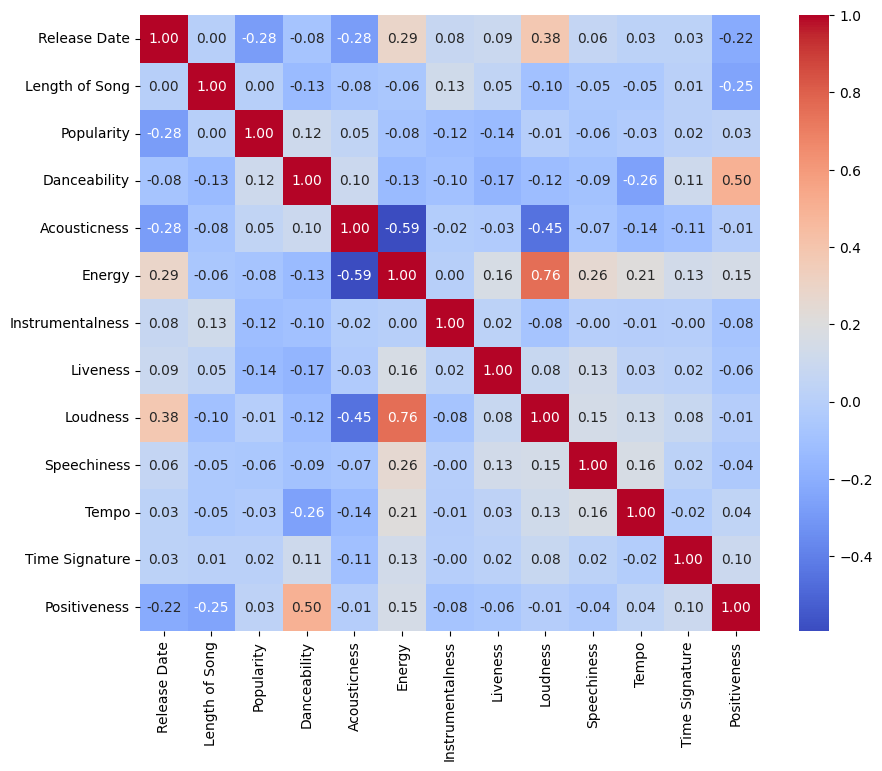

In [55]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [65]:
# Standardarize/normalize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
selected_data_standardized = pd.DataFrame(data)
selected_data_standardized

,Release Date,Length of Song,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature,Positiveness
0,1991,5.032000,74,0.502,0.000025,0.912,0.000173,0.1060,-4.556,0.0564,116.761,4,0.720
1,1971,8.047167,78,0.338,0.580000,0.340,0.003200,0.1160,-12.049,0.0339,82.433,4,0.197
2,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0.2430,-9.961,0.0536,143.883,4,0.228
3,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0.0935,-12.358,0.0252,75.752,4,0.169
4,1965,3.713550,77,0.723,0.038300,0.863,0.031700,0.1280,-7.890,0.0338,136.302,4,0.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,2014,3.559833,47,0.296,0.005910,0.776,0.801000,0.5970,-5.630,0.0597,93.481,4,0.406
5480,2014,3.179750,44,0.432,0.002130,0.887,0.916000,0.1200,-6.175,0.1230,92.965,4,0.357
5481,2014,3.396450,40,0.627,0.860000,0.609,0.890000,0.1160,-9.387,0.0332,86.861,4,0.734
5482,1972,3.567767,52,0.643,0.006690,0.644,0.673000,0.1620,-12.615,0.0462,117.225,4,0.853


In [81]:
pca = PCA()
data_pca = pca.fit_transform(selected_data_standardized)
df_pca = pd.DataFrame(data_pca)
pca_columns = ['PC' + str(i) for i in range(1, len(df_pca.columns) + 1)]
df_pca.columns = pca_columns
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,9.312708,-20.103476,-13.787635,-2.922829,1.043857,-0.275909,0.172170,0.137674,-0.013247,-0.033045,-0.037246,-0.108173,-0.040717,0.000952
1,44.387838,-33.251448,1.120476,2.338837,3.667275,0.262081,-0.115184,-0.337496,0.227991,-0.066263,-0.048606,-0.099220,-0.085301,0.005939
2,-17.283474,-30.250886,0.117915,1.345222,1.743132,0.331366,-0.242338,-0.296631,0.051646,-0.093788,0.002953,0.131038,-0.095630,0.014047
3,51.021986,-32.148131,1.671534,2.224336,-1.268010,0.407386,-0.172224,-0.544626,0.327564,0.194418,-0.086328,0.035558,0.062825,-0.014640
4,-9.393015,-37.868942,6.506377,-1.906260,-0.286525,0.121933,-0.416932,0.415224,-0.077114,0.021590,-0.031492,0.054549,0.103463,-0.029791


In [82]:
pca_variances = pca.explained_variance_ratio_
pca_variances = pd.DataFrame(pca_variances)
pca_variances.columns = ['Explained Variance']
pca_variances.index = pca_columns
print(pca_variances)

      Explained Variance
PC1             0.594901
PC2             0.257343
PC3             0.138245
PC4             0.007608
PC5             0.001628
PC6             0.000067
PC7             0.000063
PC8             0.000042
PC9             0.000035
PC10            0.000027
PC11            0.000023
PC12            0.000010
PC13            0.000007
PC14            0.000001


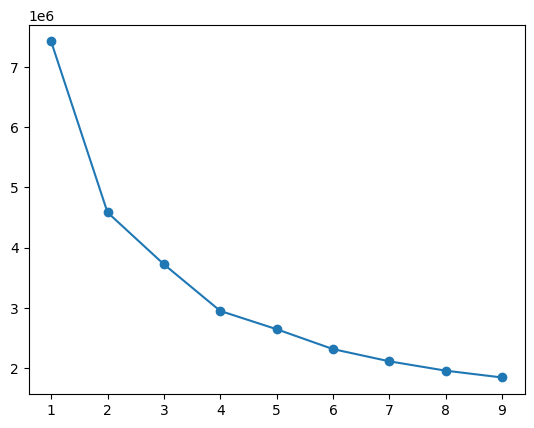

In [83]:
def find_best_no_cluster(df_dummy,k_max):
  means=[]
  sse = []
  for k in range(1,k_max):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)

    means.append(k)
    sse.append(kmeans.inertia_)

  #draw elbow graph
  plt.plot(means,sse,'o-')
  plt.xlabel = ("Number of Clusters")
  plt.ylabel = ("SSE")
  plt.title = ("Elbow Method")
  plt.show()


find_best_no_cluster(selected_data_standardized,10)

In [88]:
# Applying Kmeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(selected_data_standardized)
selected_data_standardized['cluster']  = kmeans.labels_
selected_data_standardized

,Release Date,Length of Song,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time Signature,Positiveness,cluster
0,1991,5.032000,74,0.502,0.000025,0.912,0.000173,0.1060,-4.556,0.0564,116.761,4,0.720,2
1,1971,8.047167,78,0.338,0.580000,0.340,0.003200,0.1160,-12.049,0.0339,82.433,4,0.197,0
2,1975,5.905333,74,0.392,0.288000,0.402,0.000000,0.2430,-9.961,0.0536,143.883,4,0.228,2
3,1971,3.131100,77,0.547,0.907000,0.257,0.183000,0.0935,-12.358,0.0252,75.752,4,0.169,0
4,1965,3.713550,77,0.723,0.038300,0.863,0.031700,0.1280,-7.890,0.0338,136.302,4,0.931,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,2014,3.559833,47,0.296,0.005910,0.776,0.801000,0.5970,-5.630,0.0597,93.481,4,0.406,0
5480,2014,3.179750,44,0.432,0.002130,0.887,0.916000,0.1200,-6.175,0.1230,92.965,4,0.357,0
5481,2014,3.396450,40,0.627,0.860000,0.609,0.890000,0.1160,-9.387,0.0332,86.861,4,0.734,0
5482,1972,3.567767,52,0.643,0.006690,0.644,0.673000,0.1620,-12.615,0.0462,117.225,4,0.853,2


In [89]:
df_pca["cluster"] =  kmeans.labels_

df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,cluster
0,9.312708,-20.103476,-13.787635,-2.922829,1.043857,-0.275909,0.172170,0.137674,-0.013247,-0.033045,-0.037246,-0.108173,-0.040717,0.000952,2
1,44.387838,-33.251448,1.120476,2.338837,3.667275,0.262081,-0.115184,-0.337496,0.227991,-0.066263,-0.048606,-0.099220,-0.085301,0.005939,0
2,-17.283474,-30.250886,0.117915,1.345222,1.743132,0.331366,-0.242338,-0.296631,0.051646,-0.093788,0.002953,0.131038,-0.095630,0.014047,2
3,51.021986,-32.148131,1.671534,2.224336,-1.268010,0.407386,-0.172224,-0.544626,0.327564,0.194418,-0.086328,0.035558,0.062825,-0.014640,0
4,-9.393015,-37.868942,6.506377,-1.906260,-0.286525,0.121933,-0.416932,0.415224,-0.077114,0.021590,-0.031492,0.054549,0.103463,-0.029791,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5479,31.092807,16.005994,-17.939650,-0.677268,-0.609909,0.058776,-0.041096,-0.197562,-0.350980,0.670807,0.308300,0.032736,-0.179353,0.007492,0
5480,31.517575,18.507357,-16.233948,-0.244617,-1.020398,0.027617,-0.042398,-0.152261,-0.397714,0.750010,-0.156974,-0.043161,0.037195,0.060155,0
5481,37.538592,21.986084,-13.741007,2.795527,-1.046687,0.044652,-0.085533,0.001637,0.459805,0.934560,-0.073868,-0.104071,0.059454,-0.019852,0
5482,8.748974,-12.543058,14.873139,2.571858,-0.755719,-0.386984,0.093744,0.203789,-0.403338,0.528730,-0.051858,0.073365,-0.016610,0.001539,2


In [90]:
fig = px.scatter(df_pca, x="PC1", y="PC2", color="cluster",
                 title="KMeans Clustering")
fig.show()

In [91]:
# Create a scatter plot with three principal components
fig = px.scatter_3d(df_pca, x="PC1", y="PC2", z="PC3", color="cluster",
                    title="KMeans Clustering")
# Show the plot
fig.show()

: 